# Predicting Heart Disease Using XGBoost

This notebook is part of my **early ML learning journey**, following a tutorial from the [Coursera Machine Learning Guided Project](https://coursera.org/share/4c06cda356a9e2d286030460ec852408). 

📌 **About This Notebook:**  
- This was my **first attempt at training a machine learning model**.  
- The tutorial focused on using **XGBoost**, a powerful gradient boosting algorithm, and I followed along to understand how it works.  
- I have added **some of my own notes and minor modifications** to reinforce my understanding.  

💡 **What I Learned:**  
- How to use **XGBoost** for classification problems.  
- The importance of **data preprocessing** before model training.  
- How to evaluate model performance using **accuracy, precision, recall, and AUC-ROC scores**.  

**Note:** This notebook was my **first guided ML project**, and my later projects reflect more independent work and deeper analysis.

## Importing Required Libraries
Below are the libraries used for data handling, visualization, and machine learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Exploring the Dataset
Loading the dataset and exploring its basic properties.

In [3]:
df =pd.read_csv("datasets/cardio_train.csv", sep=";")

In [4]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [5]:
df.tail(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69990,99986,15094,1,168,72.0,110,70,1,1,0,0,1,1
69991,99988,20609,1,159,72.0,130,90,2,2,0,0,1,0
69992,99990,18792,1,161,56.0,170,90,1,1,0,0,1,1
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [6]:
df.shape

(70000, 13)

In [7]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [8]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#drop id column from the dataset
df = df.drop(columns='id')

In [10]:
#converting age from days to years
df = df.assign(age = df.age/365)

In [11]:
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

In [12]:
df.groupby('cardio').mean()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,
0,51.730476,1.345707,164.448017,71.592150,120.432598,84.251763,1.216527,1.175380,0.092516,0.055424,0.817881
1,54.950173,1.353441,164.270334,76.822368,137.212042,109.023929,1.517396,1.277595,0.083736,0.052117,0.789559


In [13]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1


#### Visualizations

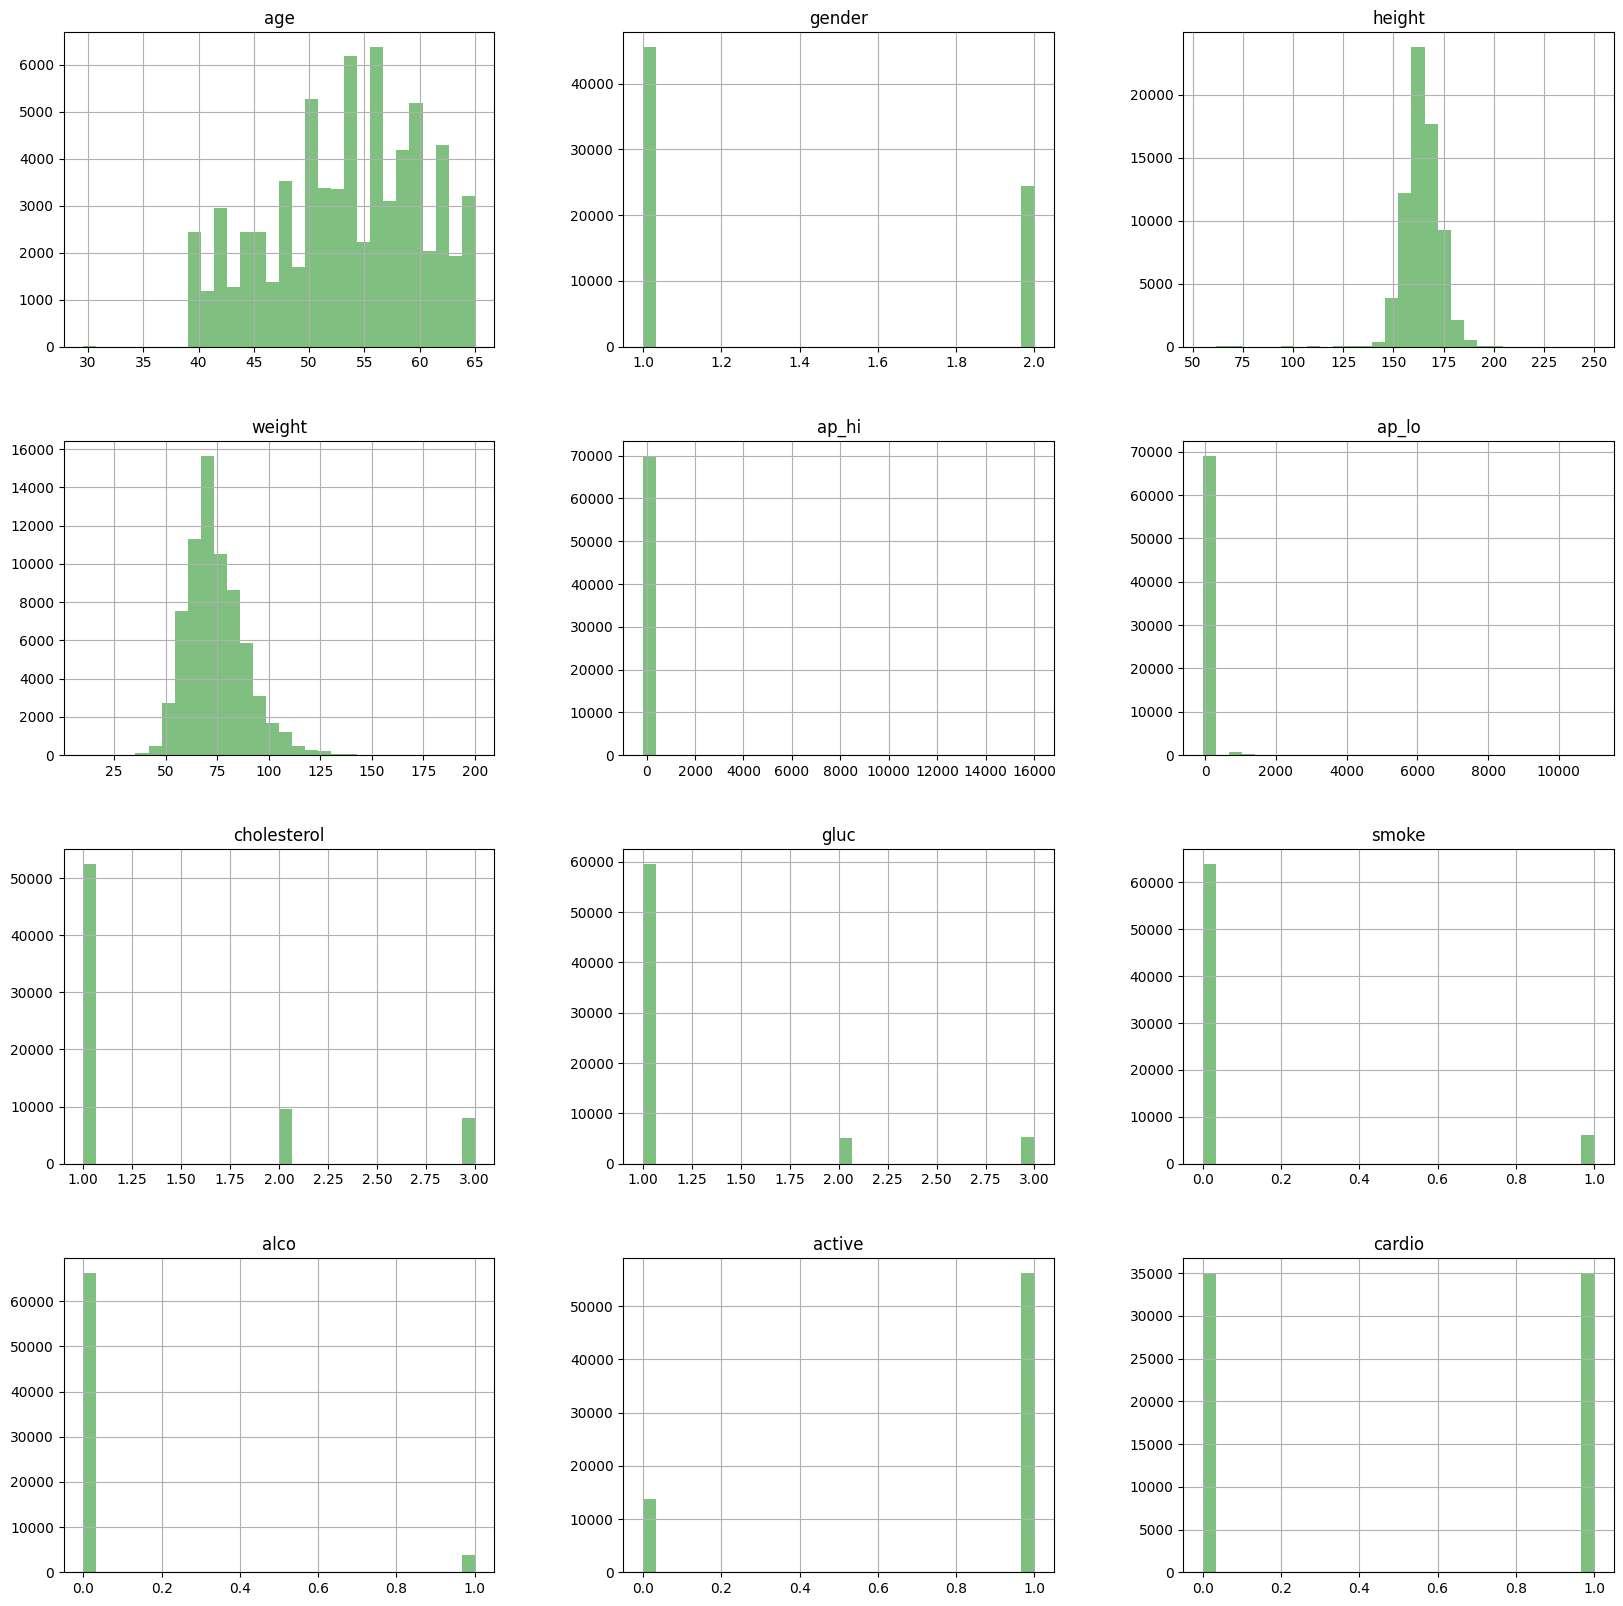

In [14]:
df.hist(bins = 30, figsize = (20,20), color = 'green', grid=True, alpha = 0.5)
plt.show()

In [15]:
#correlation matrix
corr_matrix = df.corr()
corr_matrix

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


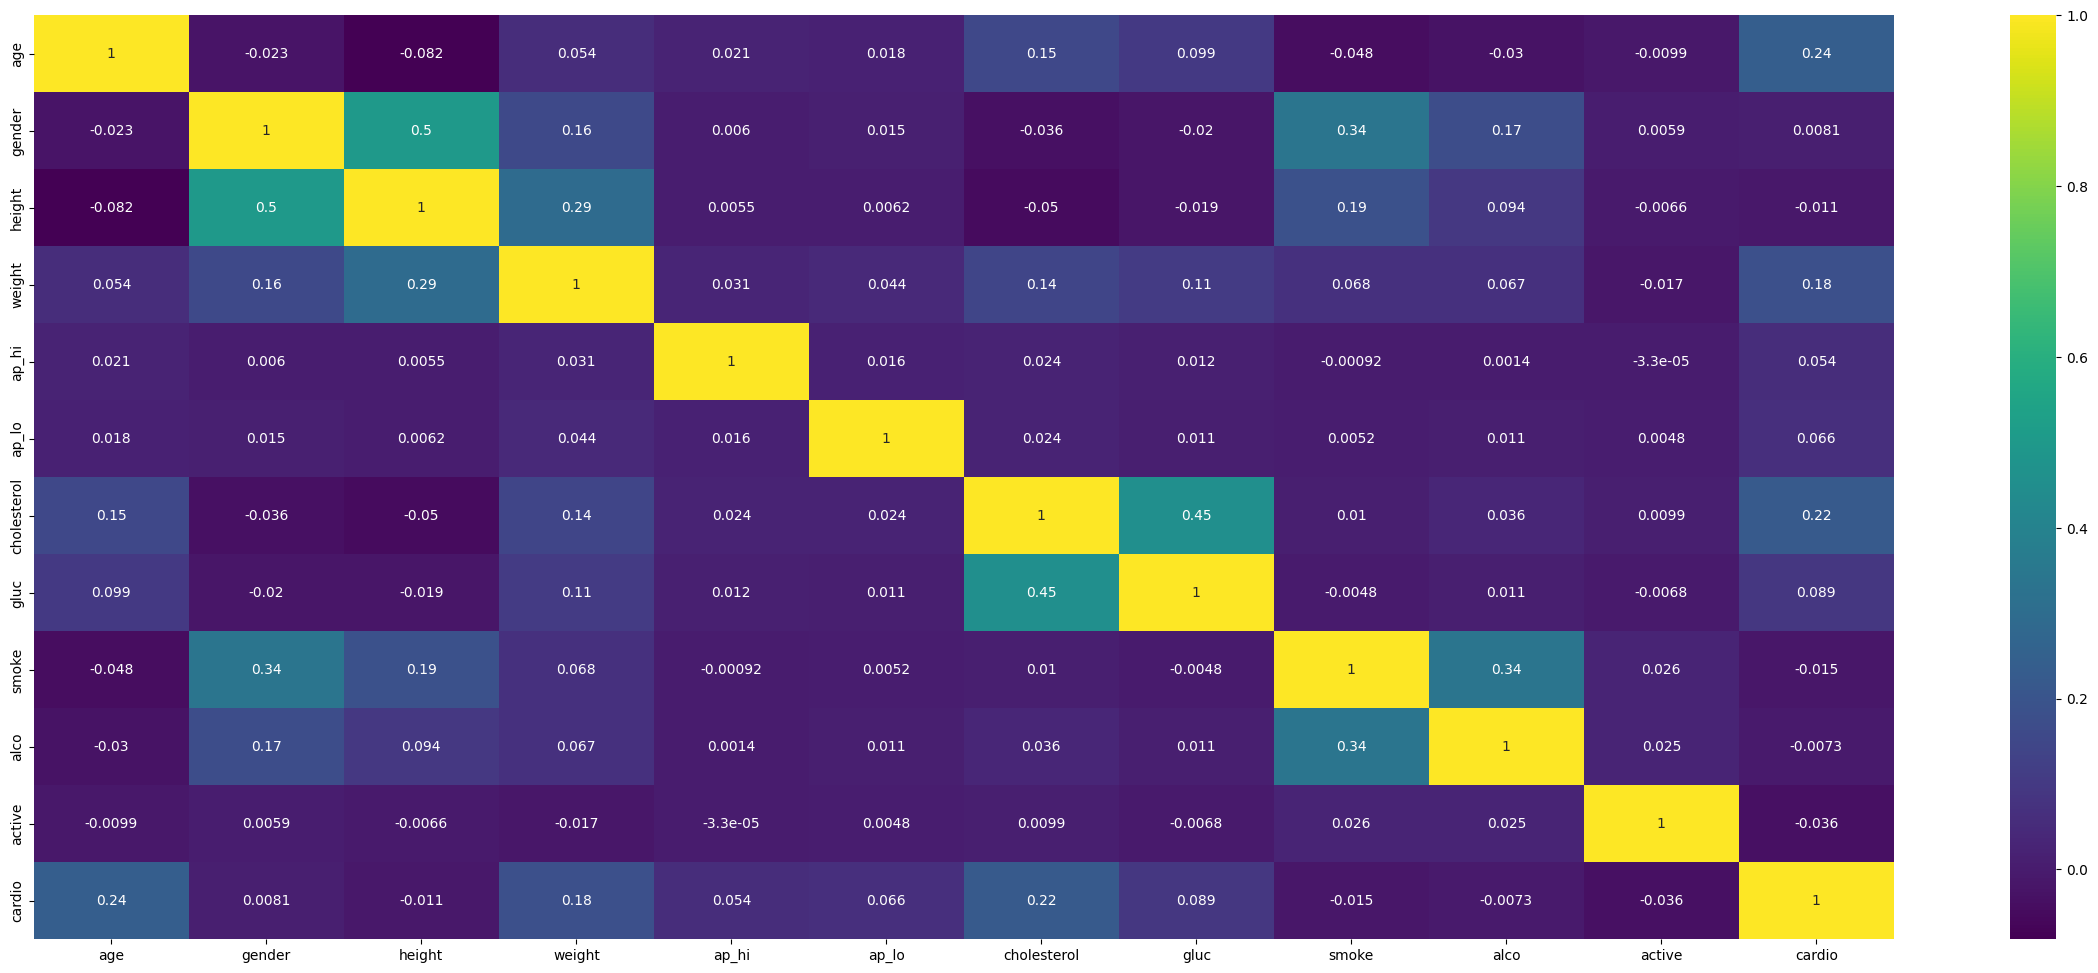

In [16]:
plt.figure(figsize = (30,12))
sns.heatmap(corr_matrix, annot = True, cmap= 'viridis')
plt.show()

## Splitting Data & Model Training
We split the dataset into training and testing sets and train a simple classification model.

In [17]:
#dataframe is split into features and target

X = df.drop(columns='cardio')
Y = df['cardio']

In [18]:
X.shape

(70000, 11)

In [19]:
Y.shape

(70000,)

In [20]:
df.shape

(70000, 12)

In [21]:
#splitting data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [22]:
X_train.shape

(56000, 11)

In [23]:
X_test.shape

(14000, 11)

In [24]:
Y_train.shape

(56000,)

In [25]:
Y_test.shape

(14000,)

In [26]:
from xgboost import XGBClassifier

In [27]:
#Training an XGBoost classifier model

xgb_model = XGBClassifier(objective = 'binary:logistic', 
                          eval_metric = 'error', 
                          learning_rate = 0.01, 
                          max_depth = 10, 
                          n_estimators = 100, 
                          use_label_encoder=False)

xgb_model.fit(X_train, Y_train)

C:\Users\eshit\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning: [15:41:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Evaluating Model Performance
We evaluate the trained model using accuracy, precision, recall, and F1-score.

In [28]:
#Predicting score of trained model using the testing dataset

result = xgb_model.score(X_test, Y_test)
print(f"Accuracy: {result}")

Accuracy: 0.7376428571428572


In [29]:
#Making predictions on the testing dataset

Y_predict = xgb_model.predict(X_test)
Y_predict

array([1, 1, 1, ..., 0, 1, 1], shape=(14000,))

In [1]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(Y_test, Y_predict))

NameError: name 'Y_test' is not defined

<Axes: >

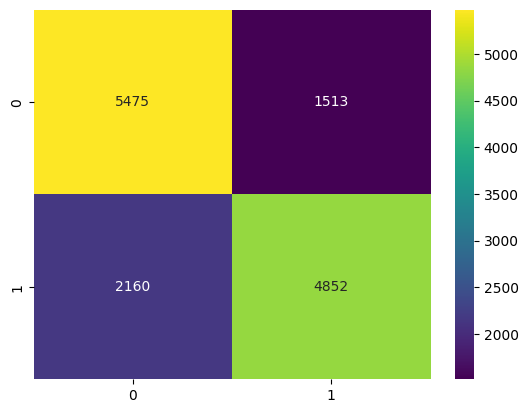

In [ ]:
cm = confusion_matrix(Y_test, Y_predict)
sns.heatmap(cm, fmt = 'd', annot=True, cmap='viridis')

In [32]:
pip install pickle

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [33]:
import pickle
filename = 'cardio_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))